# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     2.977504e+01     6.530520e+00
 * time: 0.0023450851440429688
     1     2.849619e+01     4.902385e+00
 * time: 0.008001089096069336
     2     2.113705e+01     5.164797e+00
 * time: 0.015601158142089844
     3     1.472489e+01     5.136394e+00
 * time: 0.020280122756958008
     4     1.104646e+01     1.738291e+00
 * time: 0.024950027465820312
     5     1.027349e+01     2.812921e+00
 * time: 0.02856612205505371
     6     9.641100e+00     1.260284e+00
 * time: 0.03240609169006348
     7     9.156780e+00     1.150691e+00
 * time: 0.03635001182556152
     8     8.732109e+00     1.362681e+00
 * time: 0.04027700424194336
     9     8.532542e+00     1.004004e+00
 * time: 0.04449915885925293
    10     8.371097e+00     8.936086e-01
 * time: 0.04909014701843262
    11     8.179437e+00     7.082886e-01
 * time: 0.0539250373840332
    12     8.021491e+00     4.665345e-01
 * time: 0.05874800682067871
    13     7.962520e+00     5.167123e-01
 * 

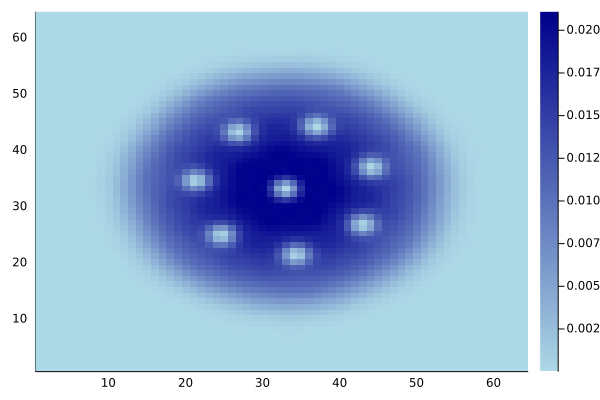

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)